In [1]:
from skimage import segmentation, graph, color
from sklearn import feature_extraction
from torchvision import datasets
import numpy as np

import sys
sys.path.append("..")
from nc_suite import *

In [2]:
# Create img and labels
mnist = datasets.MNIST('data', train=True, download=True)
img = np.asarray(mnist[2][0])

labels = np.copy(img)
labels[labels>0] = 1


labels1 = segmentation.slic(img, compactness=10, n_segments=28*28, sigma=1, # n_segments refers to things which are compared to other things..
                            start_label=0, channel_axis=None)

out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

rag = graph.rag_mean_color(img, labels1, mode='similarity', sigma=10, connectivity=2)

dense_W = feature_extraction.image.img_to_graph(img, return_as=np.ndarray) # get a dense array of the img to graph
print(dense_W.shape)
dense_D = D_matrix(dense_W)

dense_ev = solve_ncut(dense_D,dense_W)
dense_cut_mask, dense_mcut = get_min_ncut(dense_ev, dense_D, dense_W, 10) # num_cuts = 20
dense_ev = dense_ev.reshape((28,28))
dense_cut_mask = dense_cut_mask.reshape((28,28))
print(dense_mcut)

D, W = DW_matrices(rag)

ev = solve_ncut(D,W)
cut_mask, mcut = get_min_ncut(ev, D, W, 10) # num_cuts = 20


ev = ev.reshape((28,28))
cut_mask = cut_mask.reshape((28,28))

print(mcut)

# TODO:
# https://github.com/scikit-image/scikit-image/blob/5e74a4a3a5149a8a14566b81a32bb15499aa3857/skimage/graph/_graph_cut.py#L246

(784, 784)
(784, 784)
(784, 784)


/mnt/c/Users/garth/Desktop/DDN/notebooks/../nc_suite.py:77: RuntimeWarning: invalid value encountered in double_scalars
  return (cc / assoc_a) + (cc / assoc_b)


inf


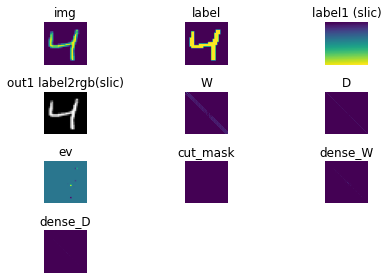

In [3]:
plot_images([img, labels, labels1, out1, W, D, ev, cut_mask, dense_W, dense_D, dense_ev, dense_cut_mask], ['img', 'label', 'label1 (slic)', 'out1 label2rgb(slic)', 'W', 'D', 'ev', 'cut_mask', 'dense_W', 'dense_D', 'dense_ev', 'dense_cut_mask'])

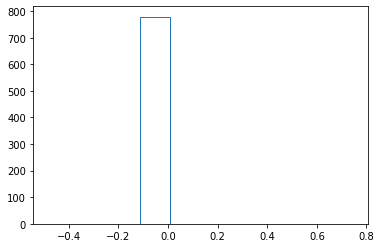

[  1   1   1 779   0   0   1   0   0   1]
[-0.48302672 -0.36028432 -0.23754193 -0.11479954  0.00794286  0.13068525
  0.25342764  0.37617004  0.49891243  0.62165482  0.74439721]


In [4]:
counts, bins = np.histogram(ev)
plt.stairs(counts,bins)
plt.show()
print(counts)
print(bins)